In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


## DATA EXPLORATION

In [31]:
#1 We load the data
df = pd.read_csv('dataset.csv', delimiter=';')
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [32]:
for i in df.select_dtypes(include='object'): 
    print(df[i].unique())

['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO']
['Android' 'Others' 'iOS' 'Windows']
['yes' 'no']
['no' 'yes']


In [33]:
#We try undersstand its structure
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3447 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

We can see that all the columns don't have the same number of value, so there must have none value that we'll have to handle

In [34]:
#3 Initial Exploration
#Let's analyze numeric values
df['normalized_new_price'] = 100*df['normalized_new_price']
df['normalized_used_price'] *= 100
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3447.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3132.637656,182.751871,2015.965258,674.869716,436.471208,523.310717
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.094692,88.413228,2.298455,248.580166,58.891362,68.363684
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,153.686722,290.142159
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,403.393085,479.034184
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,440.513262,524.589185
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,475.570001,567.371825
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,661.943300,784.784066


Observing this table we can notice some values that seem abnormal such as : 
min values of : rear_camera_mp	front_camera_mp	internal_memory and ram	
In order to confirm our assumption, we're going to see later if these values are outliers or not

In [35]:
#4 Let's look for missing values in each column
df.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    7
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [36]:
#5 Let's see the unique values for each categorical column
print("Unique values for each categorical column:")
for i in df.select_dtypes(include=object):
    print(f"Column: {i} : {df[i].unique()} \n")

Unique values for each categorical column:
Column: device_brand : ['Honor' 'Others' 'HTC' 'Huawei' 'Infinix' 'Lava' 'Lenovo' 'LG' 'Meizu'
 'Micromax' 'Motorola' 'Nokia' 'OnePlus' 'Oppo' 'Realme' 'Samsung' 'Vivo'
 'Xiaomi' 'ZTE' 'Apple' 'Asus' 'Coolpad' 'Acer' 'Alcatel' 'BlackBerry'
 'Celkon' 'Gionee' 'Google' 'Karbonn' 'Microsoft' 'Panasonic' 'Sony'
 'Spice' 'XOLO'] 

Column: os : ['Android' 'Others' 'iOS' 'Windows'] 

Column: 4g : ['yes' 'no'] 

Column: 5g : ['no' 'yes'] 



## DATA PREPROCESSING

we can see that there's no column with missedwritten value

### 1 Let's handle missing Values

In [37]:


#1.1 There's no column with a significant amount of missing value, so we cannot drop any of them based on that

#1.2 Let's replace the numeric missing value by either mean or median
    ##In this case we'll replace it by mean because the distribution is normal and there's no many outliers
for i in df.select_dtypes(exclude=object):
    df[i].fillna(df[i].mean(), inplace=True)

#Let's visualize the number of missing values
df.isnull().sum()

C:\Users\chris.DESKTOP-GCU74DF\AppData\Local\Temp\ipykernel_29580\3083291760.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


device_brand             0
os                       0
screen_size              0
4g                       0
5g                       0
rear_camera_mp           0
front_camera_mp          0
internal_memory          0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

### 2 Outlier Treatment

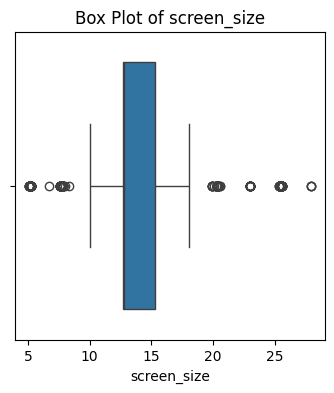

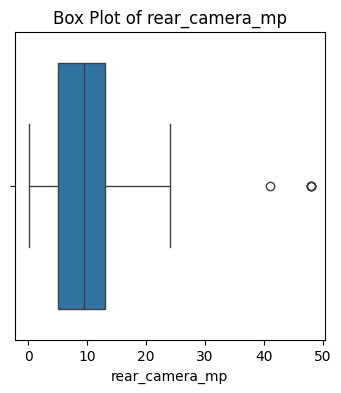

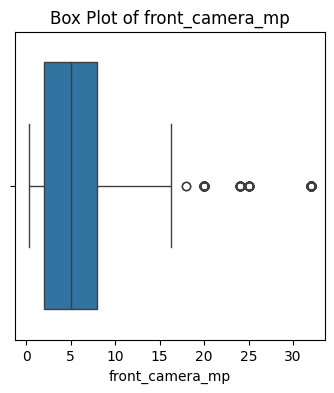

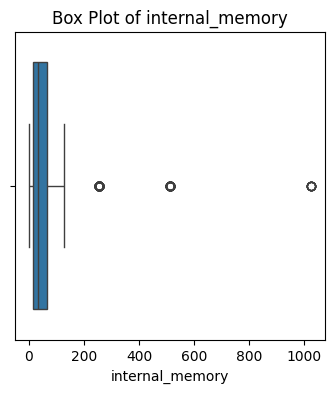

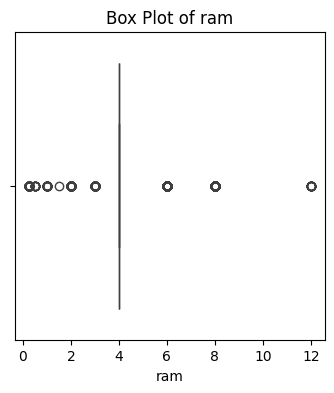

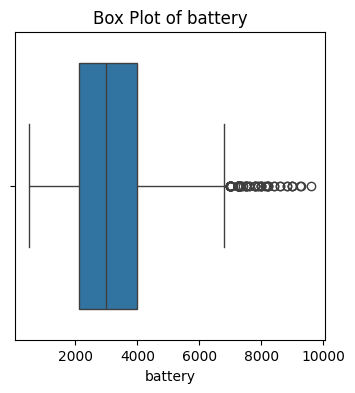

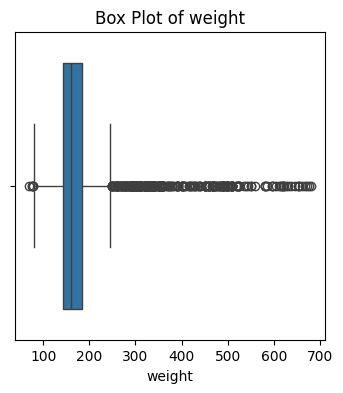

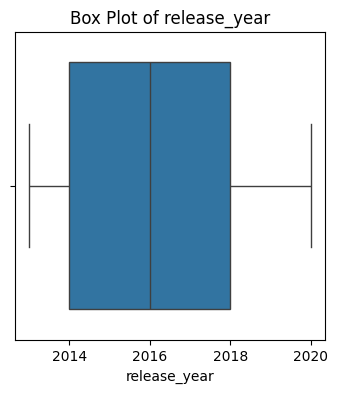

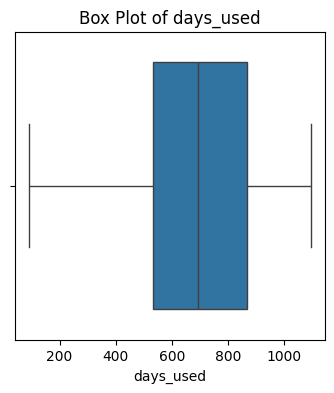

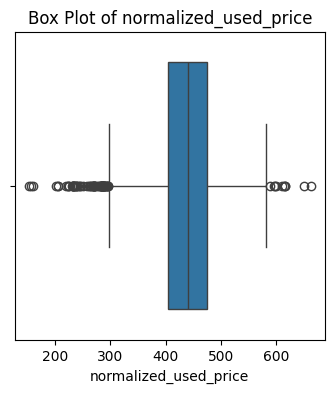

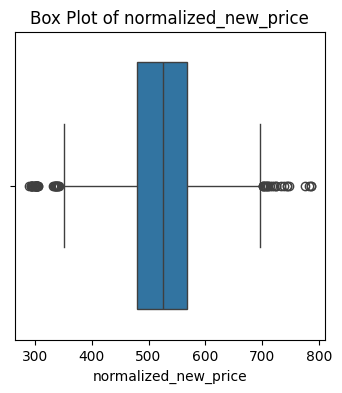

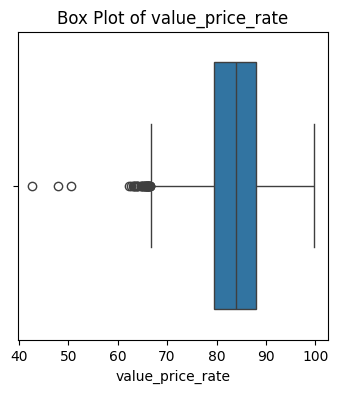

In [60]:
#2.1 Let's visualize them
# Example: Box plot to identify outliers in 'battery' column
for i in df.select_dtypes(exclude=object):
    plt.figure(figsize=(4, 4))
    sns.boxplot(x=df[i])
    plt.title(f'Box Plot of {i}')
    plt.show()

Looking at these box plot we can identify some anomalies, like in the screen size that contains values greater than 30 cm that's very unsuall for a phone, so we are going to remove alll the value greater than this value and also the weight than should not be over 800g and also the fact that front camera has as min value 0 is also unsual, so we will fix that too

In [39]:
#Removing screen size and weight
#for battery

#Removing screen size and weight

#For size
df = df[df['screen_size']<=30]

#for weight
df = df[df['weight']<=800]

#for front camera
df = df[df['front_camera_mp']>0]
df.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000,3403.000000
mean,13.749036,9.548650,6.641231,54.888748,4.076917,3137.355918,181.780154,2015.968557,674.866588,437.327375,524.382852
std,3.599432,4.649741,6.980578,83.725218,1.311837,1249.903111,82.081430,2.294694,248.299595,57.578237,66.882389
min,5.080000,0.080000,0.300000,0.010000,0.250000,500.000000,69.000000,2013.000000,91.000000,153.686722,290.142159
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.900000,2014.000000,534.000000,404.454135,479.512917
50%,12.830000,9.460208,5.000000,32.000000,4.000000,3000.000000,160.000000,2016.000000,691.000000,441.061409,524.865432
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.000000,475.617300,567.462826
max,27.940000,48.000000,32.000000,1024.000000,12.000000,9600.000000,680.000000,2020.000000,1094.000000,661.943300,784.784066


### 3 Feature engineering 

In [40]:

#3.1 Create new feature from others
    ##Why not create a value price rate, to actually show at what percentage of it orignal value the phone is currently is

df['value_price_rate'] = df['normalized_used_price'] / df['normalized_new_price']*100
df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price,value_price_rate
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,430.757245,471.510025,91.356964
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,516.209665,551.901794,93.532884
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,511.108377,588.463072,86.854792
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,513.538659,563.096085,91.199117
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,438.999480,494.783748,88.725525


In [41]:
#df[df['value_price_rate']<50]

3.2 Let's convert the categorical values into the numerical ones. We'll be using either the labelEncoder or the one-hot enconding method depending on whether we want to associate string to a number or create new binary columns for each unique categorical value of the feature


In [42]:
#We copy our dataset
data = df

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3403 entries, 0 to 3453
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3403 non-null   object 
 1   os                     3403 non-null   object 
 2   screen_size            3403 non-null   float64
 3   4g                     3403 non-null   object 
 4   5g                     3403 non-null   object 
 5   rear_camera_mp         3403 non-null   float64
 6   front_camera_mp        3403 non-null   float64
 7   internal_memory        3403 non-null   float64
 8   ram                    3403 non-null   float64
 9   battery                3403 non-null   float64
 10  weight                 3403 non-null   float64
 11  release_year           3403 non-null   int64  
 12  days_used              3403 non-null   int64  
 13  normalized_used_price  3403 non-null   float64
 14  normalized_new_price   3403 non-null   float64
 15  value_pri

## 3.2 Visualization

(array([558., 632., 506.,   0., 381., 296.,   0., 319., 441., 270.]),
 array([2013. , 2013.7, 2014.4, 2015.1, 2015.8, 2016.5, 2017.2, 2017.9,
        2018.6, 2019.3, 2020. ]),
 <BarContainer object of 10 artists>)

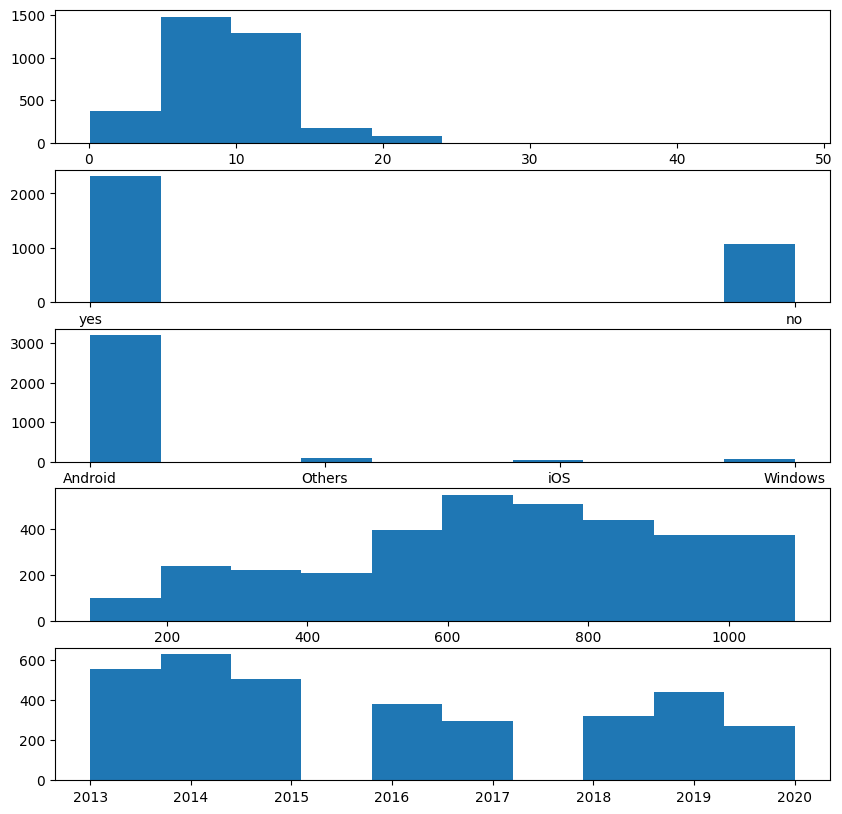

In [61]:
#5 Let's display the distribution of numerical features

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))
ax1.hist(df['rear_camera_mp'])
ax2.hist(df['4g'])
ax3.hist(df['os'])
ax4.hist(df['days_used'])
ax5.hist(df['release_year'])


<Axes: >

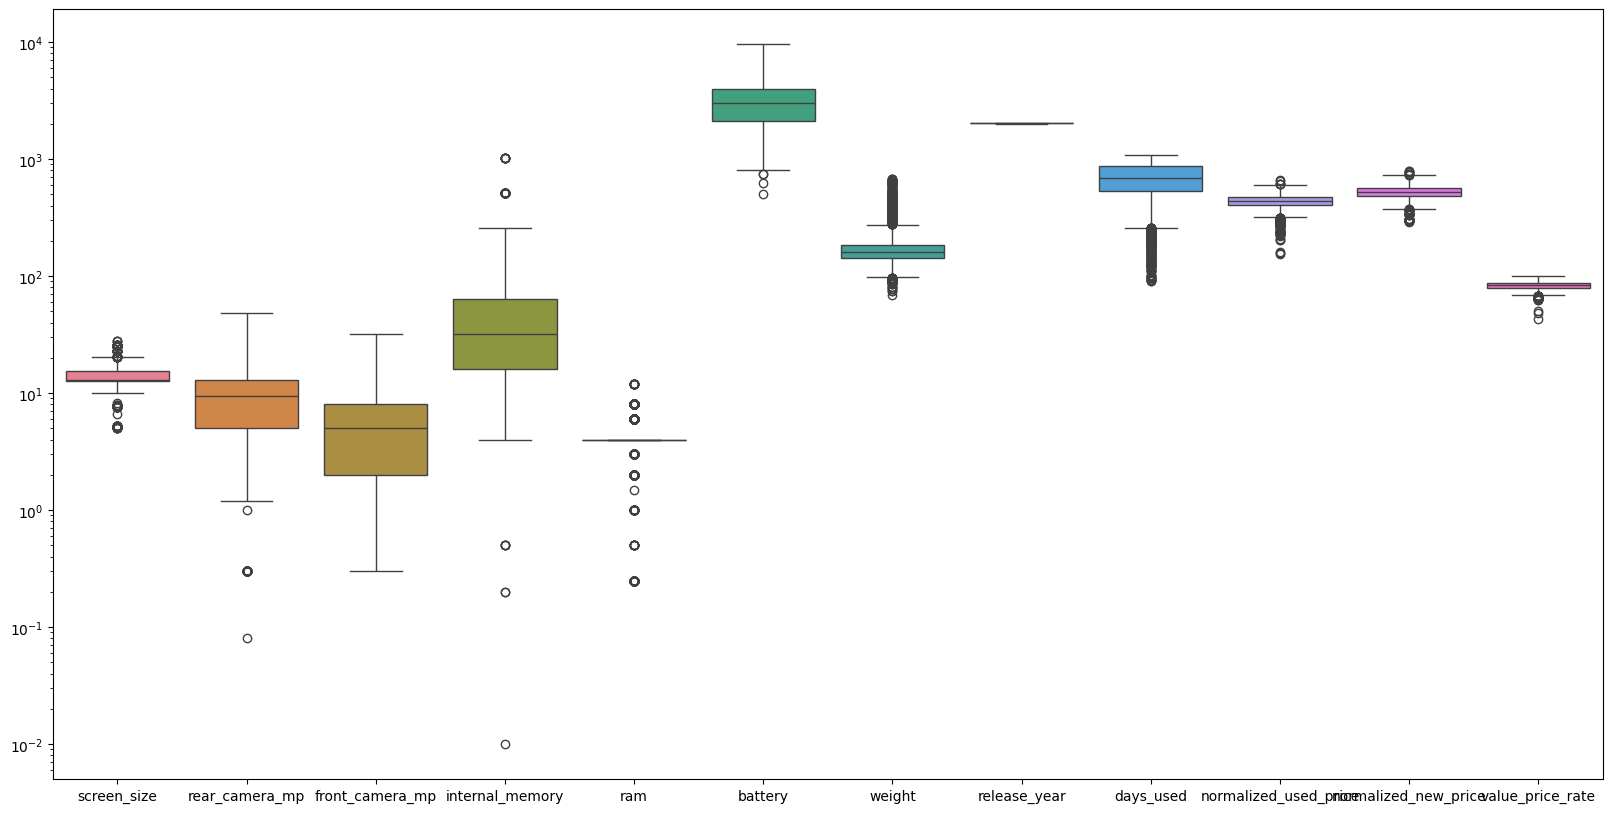

: 

In [65]:
#Let's visualize the box plot of our features

plt.figure(figsize = (20, 10))
plt.yscale('log')
sns.boxplot(data = df)

## 4 Feature Selection

This steps consists of removing all the features that are not highly useful for our model, we can make it by hand our let the machine do it for us by using the PCA (Princiap  Component Analysis)

In [44]:
#5.1 I'm going to do that by myself and then see what does the machine so I can keep what we all both agree on

#I think that quite all the features are important but we can get still get rid of the weight, 
# and (in a normal case we would also put all the 4  os feature in one because it's clear that it's not worth to create 3 more columns
#I deliberately remove the 'os' column because it looks obvious, because each phone brand uses an unique os so no need to specify it
data = data.drop('weight', axis=1)
data = data.drop('os', axis=1)

#Here I'll delete also the value stuff because altough it's a good information to know, it's impossible to ask the user that value
data = data.drop('value_price_rate', axis=1)

In [45]:
#The second way is to use the PCA and see what it does
''' 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'X' is your dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_normalized)



# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

# Cumulative explained variance
cum_explained_variance = np.cumsum(explained_variance_ratio)
print("Cumulative explained variance:", cum_explained_variance)

# Initialize PCA with number of components
pca = PCA()  # Choose number of components to keep

# Fit PCA and transform the data
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(data=df_pca)
df_pca'''
data

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,14.50,yes,no,13.000000,5.0,64.0,3.0,3020.0,2020,127,430.757245,471.510025
1,Honor,17.30,yes,yes,13.000000,16.0,128.0,8.0,4300.0,2020,325,516.209665,551.901794
2,Honor,16.69,yes,yes,13.000000,8.0,128.0,8.0,4200.0,2020,162,511.108377,588.463072
3,Honor,25.50,yes,yes,13.000000,8.0,64.0,6.0,7250.0,2020,345,513.538659,563.096085
4,Honor,15.32,yes,no,13.000000,8.0,64.0,3.0,5000.0,2020,293,438.999480,494.783748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,15.34,yes,no,9.460208,8.0,64.0,6.0,5000.0,2019,232,449.233738,648.387159
3450,Asus,15.24,yes,no,13.000000,8.0,128.0,8.0,4000.0,2018,541,503.773152,625.153773
3451,Alcatel,15.80,yes,no,13.000000,5.0,32.0,3.0,4000.0,2020,201,435.734965,452.882895
3452,Alcatel,15.80,yes,no,13.000000,5.0,32.0,2.0,4000.0,2020,149,434.976167,462.418819


## 5 Numerization

In [46]:
#3.2.1  For device, we'll use the LabelEncoder because we have more two unique values (non binary case)
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical column device brand

data['device_brand'] = label_encoder.fit_transform(data['device_brand'])

# View the mapping of original categories to numerical values
print("Mapping of categories to numerical values:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{category} -> {i}")


Mapping of categories to numerical values:
Acer -> 0
Alcatel -> 1
Apple -> 2
Asus -> 3
BlackBerry -> 4
Celkon -> 5
Coolpad -> 6
Gionee -> 7
Google -> 8
HTC -> 9
Honor -> 10
Huawei -> 11
Infinix -> 12
Karbonn -> 13
LG -> 14
Lava -> 15
Lenovo -> 16
Meizu -> 17
Micromax -> 18
Microsoft -> 19
Motorola -> 20
Nokia -> 21
OnePlus -> 22
Oppo -> 23
Others -> 24
Panasonic -> 25
Realme -> 26
Samsung -> 27
Sony -> 28
Spice -> 29
Vivo -> 30
XOLO -> 31
Xiaomi -> 32
ZTE -> 33


In [47]:
#3.2.2 Fit and transform the categorical columns 4g and 5g
data['4g'] = label_encoder.fit_transform(data['4g'])
data['5g'] = label_encoder.fit_transform(data['5g'])



#In this case I replace direcly instead of create a new column because they are binary
#no=0 and yes = 1

In [48]:
#3.2.3 Now in this case I'm going to automatically create three columns for each type of os

'''
# Using pandas get_dummies to perform one-hot encoding
os_encoded = pd.get_dummies(data['os'], prefix='os')

# Concatenate the encoded columns back to the original dataframe
df_encoded = pd.concat([data, os_encoded], axis=1)

# Drop the original 'os' column if no longer needed
df_encoded.drop(['os'], axis=1, inplace=True)

#drop device brand
df_encoded.drop(['device_brand'], axis=1, inplace=True)

# Example usage:
# df_encoded now contains binary columns for each category in 'os'.
df_encoded.head()'''

#Finally I won't use this method because otherwise I'll end up having 3 new features and having to remove the at the scaling step
#Instead of I will use the straightforward approach
data

,device_brand,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price
0,10,14.50,1,0,13.000000,5.0,64.0,3.0,3020.0,2020,127,430.757245,471.510025
1,10,17.30,1,1,13.000000,16.0,128.0,8.0,4300.0,2020,325,516.209665,551.901794
2,10,16.69,1,1,13.000000,8.0,128.0,8.0,4200.0,2020,162,511.108377,588.463072
3,10,25.50,1,1,13.000000,8.0,64.0,6.0,7250.0,2020,345,513.538659,563.096085
4,10,15.32,1,0,13.000000,8.0,64.0,3.0,5000.0,2020,293,438.999480,494.783748
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,3,15.34,1,0,9.460208,8.0,64.0,6.0,5000.0,2019,232,449.233738,648.387159
3450,3,15.24,1,0,13.000000,8.0,128.0,8.0,4000.0,2018,541,503.773152,625.153773
3451,1,15.80,1,0,13.000000,5.0,32.0,3.0,4000.0,2020,201,435.734965,452.882895
3452,1,15.80,1,0,13.000000,5.0,32.0,2.0,4000.0,2020,149,434.976167,462.418819


## 5 SPLITTING THE DATA

In [49]:
#6.1 We separe our dataset into a sets, a target value and its features
y = data['normalized_used_price']
X = data.drop('normalized_used_price', axis=1)

In [50]:
#6.2 We split them into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#6.2.2 Let's check it
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (2722, 12)
Test set size: (681, 12)


## 6 Scaling 

This step consits of converting our feature data (already numeric thanks to the normilization) into a range between 0 and 1, so that they have all the same scale and so none of them has a greater impact than the others

The standardazion consist of modifying your data in a way that their mean becomes 0 and their std 1. Here's the algorithm


scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
print("Normalized data:\n", df_normalized)

In [51]:
#I scale the training and testing set of our feature data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 7 Model Selection

Now, it's time to choose the machine learning model we want to go along with, for our prediction problem. Since it's classification problem, we will go to three algo. Then we'll choose the one with the best accuracy
-The random forest 
-Xgboost 
-SVM

In [52]:
#7.1 We create a dictionary of our models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb


models = {
    'RandomForest' : RandomForestRegressor( random_state=42),
    'XGB' : xgb.XGBRegressor( random_state=42), 
    'SVM' : SVR()
}

In [53]:
#Let's use the cross validation

# Define k-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score


kfold = KFold(n_splits=5, shuffle=True, random_state=42 )

# Perform cross-validation
def cross_val_acc(models):
    for name, model in models.items():
        scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
        print(f'the accucary of the {name} is : {scores.mean()} ')
        
cross_val_acc(models)

model = models['RandomForest']

the accucary of the RandomForest is : 0.8393987463666106 
the accucary of the XGB is : 0.8174452786892275 
the accucary of the SVM is : 0.46658479053864177 


Based on the metrics obtained we decide to move forward with the randomforest algorithm

In [54]:
#That's another approach more straightforward but less professional
#That consists of training and testing all the models directly and find the one who's the best
#The disadvantage is that the model is trainned on only one set
'''from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

def accu(y_true, y_pred, retu = False):
    acc = r2_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f'The model accuracy is :{acc}')
scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')    

def models_eval(models, X_train, y_train, X_test, y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, y_train)
        accu(y_test, model.predict(X_test))
        print('-'*30)
        
models_eval(models, X_train, y_train, X_test, y_test)'''

"from sklearn.metrics import r2_score\nfrom sklearn.model_selection import cross_val_score\n\ndef accu(y_true, y_pred, retu = False):\n    acc = r2_score(y_true, y_pred)\n    if retu:\n        return acc\n    else:\n        print(f'The model accuracy is :{acc}')\nscores = cross_val_score(model, X, y, cv=kfold, scoring='r2')    \n\ndef models_eval(models, X_train, y_train, X_test, y_test):\n    for name, model in models.items():\n        print(name, ':')\n        model.fit(X_train, y_train)\n        accu(y_test, model.predict(X_test))\n        print('-'*30)\n        \nmodels_eval(models, X_train, y_train, X_test, y_test)"

## 8 Hyperparameter Tuning

This step aims to improve the metric of our model by testing multiples set of values of hyperparameters, so we can find the best combination

In [55]:
#8.1 I declare a dictionary of diferents values for each hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [56]:
#8.2 We apply the algorithm that will test each combination and return the best one

# Set up GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

#8.2.1 We take our algorithm and we train it on our data
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

#8.2.2 We return the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate model performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"The R2 score is : {r2}")



Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\chris.DESKTOP-GCU74DF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
464 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chris.DESKTOP-GCU74DF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chris.DESKTOP-GCU74DF\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\chris.DESKTOP-GCU74DF\AppDa

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
The R2 score is : 0.8442080069038682


As you can see this method allowed us to improve from 0.01 our model what's not bad.

## 9 DEPLOYMENT

This step consits of serialize our model and integrate it into an application where the user will be able to interact with it

In [57]:
#9.1 We serialize our model to a file
import joblib

joblib.dump(best_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

['label_encoder.pkl']